# Contents
* 1. Task overview
* 2. Imports and global variables
* 3. Generate data
* 4. Create ordered list of distances
* 5. Epsilon loop in delta steps
* Choose pair that voids large clusters

When comparing 3 clusters, the two smallest should merge

Compare centers of the clusters

Find minimum distance

* Merge
* Plot

# 1. Task overview

# 2. Imports and global variables

In [0]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import random

# For drawing numbers from normal distribution
from scipy.stats import norm

# For fixing the output of random generators
from numpy.random import seed

# For providing a mean function 
from statistics import mean 

n = 5
seed(1)

In [0]:
# Calculate distance between all clusters
# Loop epsilon = delta, sadfsdfsadf
#    Subsample of pairs < epsilon & not same cluster
#    Loop: Choose k pairs randomly
#       i, j = argmin [c_j, x c_j]
#       c_i + c_j -> c_j
#       Util subsample size smaller 3

def choose_random_mus_and_sigmas_for_step_zero(number_of_dimensions):
  list_with_mus_and_sigmas_as_dict = []
  for dimension in range(0, number_of_dimensions):
    list_with_mus_and_sigmas_as_dict.append(
      {
        'mu': rand(1)[0],
        'sigma': rand(1)[0]
      }
    )
  return list_with_mus_and_sigmas_as_dict

def calculate_distance():
  pass

def check_size():
  pass

def calculate_distance_between_two_groups(group1, group2, number_of_dimensions):
  euclidean_distances = []
  for element_in_group1 in group1:
    for element_in_group2 in group2:
      euclidean_distance = np.linalg.norm([element_in_group1, element_in_group2], axis=number_of_dimensions)
      euclidean_distances.append(euclidean_distance)
  mean_euclidean_distance = mean(euclidean_distances)
  return

def create_merge_list(list_of_clusters, epsilon, number_of_dimensions):
  counter = 0
  euclidean_distances = []
  for group1 in list_of_clusters:
    try:
      group2 = list_of_clusters[counter + 1]
    except:
      break
    euclidean_distance = calculate_distance_between_two_groups(
        group1, 
        group2, 
        number_of_dimensions
    )
    if euclidean_distance < epsilon:
      group1.extend(group2)
      del list_of_clusters[counter + 1]
    euclidean_distances.append(euclidean_distance)
    counter = counter + 1
  return list_of_clusters

def sample_from_the_merge_list(list_to_be_merged, number_to_be_sampled):
  if number_to_be_sampled > len(list_to_be_merged):
    number_to_be_sampled = len(list_to_be_merged)
  sorted_sample = [
      list_to_be_merged[i] for i in sorted(random.sample(range(len(list_to_be_merged)), number_to_be_sampled))
  ]
  return sorted_sample

def calculate_new_clusters(list_of_clusters, epsilon, number_of_dimensions):
  # Put all dimensions in another list to allow for multiple lists inside of one dimension
  index = 0
  for cluster in list_of_clusters:
    list_of_clusters[index] = [cluster]
    index = index + 1
      
  list_to_be_merged = create_merge_list(list_of_clusters, epsilon, number_of_dimensions)
  
  merge_list = sample_from_the_merge_list(list_to_be_merged, number_to_be_sampled=3)
  
def clustering_algorithm(max_iter, tolerance, number_of_dimensions, initial_epsilon, n):
  epsilon = initial_epsilon
  
  # Choose random starting values
  list_with_mus_and_sigmas_as_dict = choose_random_mus_and_sigmas_for_step_zero(number_of_dimensions)
  # Output will be: [{'mu':, 'sigma':}, {'mu':, 'sigma':}]
  
  for t in range(0, max_iter):
    # Loop over all dimensions
    dimensions = []
    for mu_and_sigma_of_this_distribution in list_with_mus_and_sigmas_as_dict:
      # Generate one dimension
      dimension = []
      for observation in range(0, n):
        dimension.append(
          norm.rvs(
            size=10000,
            loc=mu_and_sigma_of_this_distribution['mu'],
            scale=mu_and_sigma_of_this_distribution['sigma']
          )
        )
      dimensions.append(dimension)
      
      print(dimensions)
      
      calculate_new_clusters(dimensions, epsilon, number_of_dimensions)
    
    distance_measure = 1
    if tolerance > distance_measure:
      break
    
    epsilon = epsilon + sigma
        
# Call function
clustering_algorithm(
    max_iter=2,
    tolerance=2,
    number_of_dimensions=2,
    initial_epsilon=1,
    n=n
)       

[[array([0.4791401 , 0.50200038, 0.46566769, ..., 0.43780855, 0.59130436,
       0.56748709]), array([0.50514809, 0.498115  , 0.68233903, ..., 0.5072663 , 0.45575817,
       0.55074208]), array([0.43747679, 0.41988969, 0.39578063, ..., 0.46870287, 0.5845147 ,
       0.373117  ]), array([0.43004097, 0.44249972, 0.64846974, ..., 0.49119253, 0.66703306,
       0.51857172]), array([0.31025523, 0.31952041, 0.24058599, ..., 0.56102509, 0.39641115,
       0.48336859])]]
[[[array([0.4791401 , 0.50200038, 0.46566769, ..., 0.43780855, 0.59130436,
       0.56748709]), array([0.50514809, 0.498115  , 0.68233903, ..., 0.5072663 , 0.45575817,
       0.55074208]), array([0.43747679, 0.41988969, 0.39578063, ..., 0.46870287, 0.5845147 ,
       0.373117  ]), array([0.43004097, 0.44249972, 0.64846974, ..., 0.49119253, 0.66703306,
       0.51857172]), array([0.31025523, 0.31952041, 0.24058599, ..., 0.56102509, 0.39641115,
       0.48336859])]], [array([0.5464168 , 0.64228208, 0.50031242, ..., 0.5618063 , 0

AttributeError: ignored

Implementation erik


In [0]:
import sklearn
from sklearn import cluster, datasets, mixture
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import random

In [0]:
def reassign(pair,sample_cl,max_cl_size):
    '''
    pair        = two samples to connect
    sample_cl   = dict sample cluster allocation
    max_cl_size = size largest cluster
    
    assign sample of the smaler cluster (and all samples which belong to the same cluster)
    to the cluster of the other sample
    
    update max_cl_size if new cluster is larger
    '''
    
    
    p0_size = sum([b ==sample_cl[pair[0]] for b in sample_cl.values()])
    p1_size = sum([b ==sample_cl[pair[1]] for b in sample_cl.values()])

    if p0_size >= p1_size:
    
        for key in sample_cl.keys():
            if sample_cl[key] == sample_cl[pair[1]]:
                sample_cl[key] = sample_cl[pair[0]]
              

            new_cl_size = sum([b ==sample_cl[pair[0]] for b in sample_cl.values()])
            if new_cl_size > max_cl_size:
                max_cl_size = new_cl_size
    else:
        for key in sample_cl.keys():

            if sample_cl[key] == sample_cl[pair[0]]:
                sample_cl[key] = sample_cl[pair[1]]
         

            new_cl_size = sum([b ==sample_cl[pair[1]] for b in sample_cl.values()])
            if new_cl_size > max_cl_size:
                max_cl_size = new_cl_size
                
    return sample_cl, max_cl_size
    

In [0]:
def sort_pairs_rand(input_pairs,sample_cl):
    '''
    sample randomly three pairs of all which meet the distance threshold
    sort those by min cluster size to connect the smalest
    '''
    pairs = []
    prods = []
    #same cluster
    input_pairs = [p for p in input_pairs if sample_cl[p[0]] != sample_cl[p[1]] ]
    if len(input_pairs)>3:
        input_pairs = random.sample(input_pairs, 3)
    for pair in input_pairs:
        # reorder pairs by pair[0] * pair[1] -> min
        size_0 =  sum([b == pair[0] for b in sample_cl.values()])
        size_1 =  sum([b == pair[1] for b in sample_cl.values()])
        prod = size_0 * size_1
        pairs.append(pair)
        prods.append(prod)
    sorted_pairs = [x for _, x in sorted(zip(prods,pairs), key=lambda pair: pair[0])]
    
    return sorted_pairs


In [0]:
def drop_dublicate(matrix,sample_cl):
    '''
    each pair occurs twice (matrix) and
    drop if sample pairs have the same assigned cluster
    '''
    pairs = [[pair[0],pair[1]] for pair in matrix if pair[0]>pair[1]]
    cl_to_cl = []
    pairs_out = []
    for pair in pairs:
        if pair not in cl_to_cl:
            cl_to_cl.append([sample_cl[pair[0]],sample_cl[pair[1]]])
            cl_to_cl.append([sample_cl[pair[1]],sample_cl[pair[0]]])
            pairs_out.append(pair)
    
    return pairs_out
#drop_dublicate(np.argwhere(np.ma.getmask(mdm)==False))

In [0]:
def cluster_3r(p,sample_cl,max_cluster_size):
    '''
    assign pairs 
    '''

    while len(p) > 0:
        
        sorted_pairs = sort_pairs_rand(p,sample_cl)
        if len(sorted_pairs) == 0:
            break
   
        pair = sorted_pairs[-1]
        #print(sample_cl[pair[0]],sample_cl[pair[1]])
        sample_cl, max_cluster_size = reassign(pair,sample_cl,max_cluster_size)
        
        for pair in sorted_pairs:
            p.remove(pair)

        p = [p_ for p_ in p if sample_cl[p_[0]] != sample_cl[p_[1]] ]
    return sample_cl, max_cluster_size


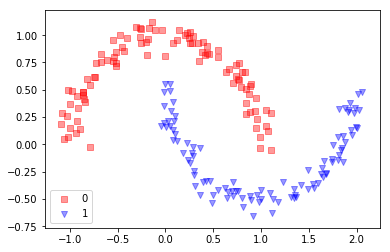

In [6]:
#X, y = datasets.make_circles(n_samples=200, factor=.5, noise=.03)
#X, y = datasets.make_blobs(n_samples=200, centers=4, n_features=2)
X, y  = datasets.make_moons(n_samples=200, noise=.07)


# Visualize the data
markers = ('s', 'v','x','o','s', 'v','x','o','s', 'v','x','o') 
colors = ('r', 'b','y','g','r', 'b','y','g','r', 'b','y','g')

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X[y==l, 0], # Pick x component for label
                X[y==l, 1],
                color=c, label=l, marker=m, alpha=0.4) 

plt.legend(loc='lower left')
plt.show()

In [0]:
sample_to_cluster_dict = {}
for i in range(0,len(X)):
    #sample - cluster
    sample_to_cluster_dict[i]=i
    
dm = distance_matrix(X,X)

In [8]:
%%time
epsilon = [0]
np_cluster = [0]
criterion = []
max_cluster_size = 1
max_crit = 0.01
i = 0

e = np.min(np.ma.masked_where(dm==0, dm))
lr = np.log(np.mean(np.ma.masked_where(dm==0, dm))+1)/300

while e < np.mean(dm):

    e = e + lr
    
    sample_to_cluster_dict_t1 = sample_to_cluster_dict.copy()
    
    mdm = np.ma.masked_where(dm>e, np.ma.masked_where(dm==0, dm))
    p = drop_dublicate(np.argwhere(np.ma.getmask(mdm)==False),sample_to_cluster_dict)

    sample_to_cluster_dict, max_cluster_size = cluster_3r(p,sample_to_cluster_dict,max_cluster_size)

    crit = np.log((e * max_cluster_size) / max(epsilon[i] * np_cluster[i],0.05)) * min(i,1) * np.log(max_cluster_size - np_cluster[i]+1)
    epsilon.append(e)
    np_cluster.append(max_cluster_size)
    criterion.append(crit)

    i += 1
    #print(i,crit,max_cluster_size,'bb',len(p))
    if crit > max_crit:
        max_crit = crit
        sample_to_cluster_dict_final = sample_to_cluster_dict_t1.copy()
        final_epsilon = i
        
    j = str(i)

    num_str = np.where(len(j)==1,'00'+j,np.where(len(j)==2,'0'+j,j))   
    
    #y = [a for a in sample_to_cluster_dict.values()]
    #plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20', alpha=0.4)
    #plt.savefig('pic/books_read'+str(num_str)+'.png')
    #plt.show()
    #print(i,max_cluster_size,crit)
    if len(np.unique(np.array([n for n in sample_to_cluster_dict.values()]))) < 2:
        break
    

CPU times: user 12.8 s, sys: 5.63 ms, total: 12.8 s
Wall time: 12.8 s


In [9]:
cluster_num = np.array([a for a in sample_to_cluster_dict_final.values()])
print(final_epsilon,len(np.unique(cluster_num)))

94 2


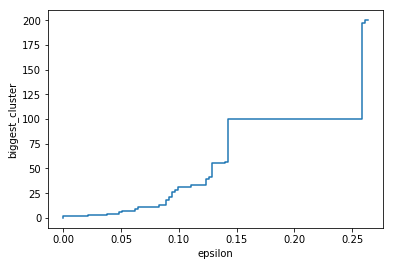

In [10]:
import matplotlib.pyplot as plt
plt.step(epsilon,np_cluster)
plt.xlabel('epsilon')
plt.ylabel('biggest_cluster')
#plt.set_size_inches(18.5, 10.5)
plt.show()

In [0]:
y = [a for a in sample_to_cluster_dict_final.values()]

for cl in np.unique(np.array(y)):
    #print(cl,y.count(cl))
    if y.count(cl) < 4:
        y = [0 if x==cl else x for x in y]

In [12]:
np.unique(y)

array([159, 183])

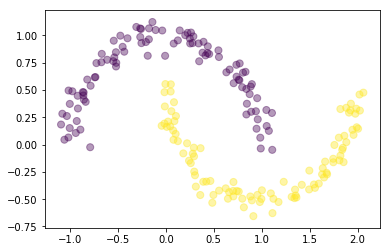

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', alpha=0.4)